# STAT 207 Project 03 - Factors of Online Food Orders  

Brian Lee(junwoo3), Charlene lu (cl152), Nathan Lee (hnlee2)

## 1. Introduction

a. Title: Factors of Online Food Orders  

In [13]:
#Imports here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
import numpy as np

b. Dataset introduction: The dataset contains information collected from an online food-ordering platform with variable factors including Age, Gender, Marital Status, Occupation, Monthly Income, and Pin Code. The data points were updated 2 months ago so the data is from recent years.

c. Motivation: The motivation for someone to explore our dataset would be to understand the target consumer who puts in online orders and those who leave the most positive feedback. A future online food-selling business owner would find this useful to see which group of people to target the ads and, thus, receive more customers. Additionally, they could use this to narrow down the age group to which their online food orders typically reach out to.

d. Research Questions: Is there a correlation between age and a consumer’s demographic when ordering food online? This is an interesting question as it will predict the age of a person who is likely to use an online food website for shopping and/or age group of the type of people that their online food orders attract. Is there a correlation between positive feedback and age/marital status/gender/family size? This is an interesting question as a potential food online website owner can determine which type of person to target their website to as to establish the most positive feedback.

## 2. Linear Regression Analytical Tasks

a. Research Questions: What is the relationship between age and gender after controlling for family size, marital status, and occupation? How does our trained model perform with our testing data?

In [14]:
df = pd.read_csv("onlinefoods.csv")
df["Marital_Status"] = df["Marital Status"]
df["Family_size"] = df["Family size"]
df = df.drop(columns = ["Family size", "Marital Status"])
df_train, df_test = train_test_split(df, test_size = 0.2, random_state = 100)
df_train

,Age,Gender,Occupation,Monthly Income,Educational Qualifications,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12,Marital_Status,Family_size
333,29,Male,Employee,25001 to 50000,Graduate,12.9261,77.6221,560034,No,Negative,No,Married,4
368,23,Female,Student,No Income,Post Graduate,12.9369,77.6407,560095,No,Positive,No,Single,3
301,22,Female,Student,No Income,Graduate,12.9473,77.5616,560019,Yes,Positive,Yes,Single,6
219,27,Female,Self Employeed,25001 to 50000,Graduate,13.0078,77.5577,560055,Yes,Positive,Yes,Married,3
6,22,Male,Student,No Income,Graduate,12.9770,77.5773,560009,Yes,Positive,Yes,Single,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,28,Male,Employee,25001 to 50000,Post Graduate,13.0262,77.6200,560045,Yes,Positive,Yes,Married,5
359,29,Male,Self Employeed,More than 50000,Graduate,12.8845,77.6036,560076,Yes,Positive,Yes,Single,6
323,22,Male,Student,No Income,Graduate,13.0158,77.5390,560096,Yes,Positive,Yes,Single,3
280,19,Male,Student,No Income,Graduate,12.9048,77.6821,560036,Yes,Positive,Yes,Single,6


In [15]:
df

,Age,Gender,Occupation,Monthly Income,Educational Qualifications,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12,Marital_Status,Family_size
0,20,Female,Student,No Income,Post Graduate,12.9766,77.5993,560001,Yes,Positive,Yes,Single,4
1,24,Female,Student,Below Rs.10000,Graduate,12.9770,77.5773,560009,Yes,Positive,Yes,Single,3
2,22,Male,Student,Below Rs.10000,Post Graduate,12.9551,77.6593,560017,Yes,Negative,Yes,Single,3
3,22,Female,Student,No Income,Graduate,12.9473,77.5616,560019,Yes,Positive,Yes,Single,6
4,22,Male,Student,Below Rs.10000,Post Graduate,12.9850,77.5533,560010,Yes,Positive,Yes,Single,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,Female,Student,No Income,Post Graduate,12.9766,77.5993,560001,Yes,Positive,Yes,Single,2
384,23,Female,Student,No Income,Post Graduate,12.9854,77.7081,560048,Yes,Positive,Yes,Single,4
385,22,Female,Student,No Income,Post Graduate,12.9850,77.5533,560010,Yes,Positive,Yes,Single,5
386,23,Male,Student,Below Rs.10000,Post Graduate,12.9770,77.5773,560009,Yes,Positive,Yes,Single,2


In [16]:
model = smf.ols("Age ~ Gender + Marital_Status + Family_size + Occupation", data = df_train).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Age   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     53.96
Date:                Sat, 20 Apr 2024   Prob (F-statistic):           1.28e-49
Time:                        17:25:38   Log-Likelihood:                -648.42
No. Observations:                 310   AIC:                             1313.
Df Residuals:                     302   BIC:                             1343.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              26.8440      0.427     62.856      0.000      26.004      27.684
Gender[T.Male]                          0.5697      0.233      2.445      0.015       0.111       1.028
Marital_Status[T.Prefer not to say]    -1.4282      0.679     -2.104      0.036      -2.764      -0.093
Marital_Status[T.Single]               -2.5611      0.332     -7.724      0.000      -3.214      -1.909
Occupation[T.House wife]                3.7683      0.866      4.352      0.000       2.064       5.472
Occupation[T.Self Employeed]           -0.3952      0.376     -1.052      0.294      -1.135       0.344
Occupation[T.Student]                  -2.2860      0.310     -7.362      0.000      -2.897      -1.675
Family_size                             0.1295      0.087      1.480      0.140      -0.043       0.302
==============================================================================
Omnibus:                        1.711   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.425   Jarque-Bera (JB):                1.488
Skew:                           0.072   Prob(JB):                        0.475
Kurtosis:                       3.307   Cond. No.                         29.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

c. predicted age = 26.8440 + 0.5697 * Gender[T.Male] - 1.4282 * Marital_Status[T.Prefer not to say] - 2.5611 * Marital_Status[T.Single] + 3.7683 * Oc cupation[T.House wife] - 0.3952 * Occupation[T.Self Employeed] - 2.2860 * Occupation[T.Student] + 0.1295 * Family_size

In [17]:
df_train["Occupation"].unique()

array(['Employee', 'Student', 'Self Employeed', 'House wife'],
      dtype=object)

In [18]:
df_train["predictions"] = model.predict()
df_train

,Age,Gender,Occupation,Monthly Income,Educational Qualifications,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12,Marital_Status,Family_size,predictions
333,29,Male,Employee,25001 to 50000,Graduate,12.9261,77.6221,560034,No,Negative,No,Married,4,27.931530
368,23,Female,Student,No Income,Post Graduate,12.9369,77.6407,560095,No,Positive,No,Single,3,22.385295
301,22,Female,Student,No Income,Graduate,12.9473,77.5616,560019,Yes,Positive,Yes,Single,6,22.773689
219,27,Female,Self Employeed,25001 to 50000,Graduate,13.0078,77.5577,560055,Yes,Positive,Yes,Married,3,26.837192
6,22,Male,Student,No Income,Graduate,12.9770,77.5773,560009,Yes,Positive,Yes,Single,3,22.954995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,28,Male,Employee,25001 to 50000,Post Graduate,13.0262,77.6200,560045,Yes,Positive,Yes,Married,5,28.060994
359,29,Male,Self Employeed,More than 50000,Graduate,12.8845,77.6036,560076,Yes,Positive,Yes,Single,6,25.234173
323,22,Male,Student,No Income,Graduate,13.0158,77.5390,560096,Yes,Positive,Yes,Single,3,22.954995
280,19,Male,Student,No Income,Graduate,12.9048,77.6821,560036,Yes,Positive,Yes,Single,6,23.343388


In [19]:
df_train["residual"] = df_train["Age"] - df_train["predictions"]
df_train

,Age,Gender,Occupation,Monthly Income,Educational Qualifications,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12,Marital_Status,Family_size,predictions,residual
333,29,Male,Employee,25001 to 50000,Graduate,12.9261,77.6221,560034,No,Negative,No,Married,4,27.931530,1.068470
368,23,Female,Student,No Income,Post Graduate,12.9369,77.6407,560095,No,Positive,No,Single,3,22.385295,0.614705
301,22,Female,Student,No Income,Graduate,12.9473,77.5616,560019,Yes,Positive,Yes,Single,6,22.773689,-0.773689
219,27,Female,Self Employeed,25001 to 50000,Graduate,13.0078,77.5577,560055,Yes,Positive,Yes,Married,3,26.837192,0.162808
6,22,Male,Student,No Income,Graduate,12.9770,77.5773,560009,Yes,Positive,Yes,Single,3,22.954995,-0.954995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,28,Male,Employee,25001 to 50000,Post Graduate,13.0262,77.6200,560045,Yes,Positive,Yes,Married,5,28.060994,-0.060994
359,29,Male,Self Employeed,More than 50000,Graduate,12.8845,77.6036,560076,Yes,Positive,Yes,Single,6,25.234173,3.765827
323,22,Male,Student,No Income,Graduate,13.0158,77.5390,560096,Yes,Positive,Yes,Single,3,22.954995,-0.954995
280,19,Male,Student,No Income,Graduate,12.9048,77.6821,560036,Yes,Positive,Yes,Single,6,23.343388,-4.343388


In [20]:
RMSE_train = mean_squared_error(df_train["Age"], df_train["predictions"], squared=False)
RMSE_train

1.9596024694007996

In [21]:
df_test["predictions"] = model.predict(df_test)
RMSE_test = mean_squared_error(df_test["Age"], df_test["predictions"], squared=False)
RMSE_test

2.0415595267787605

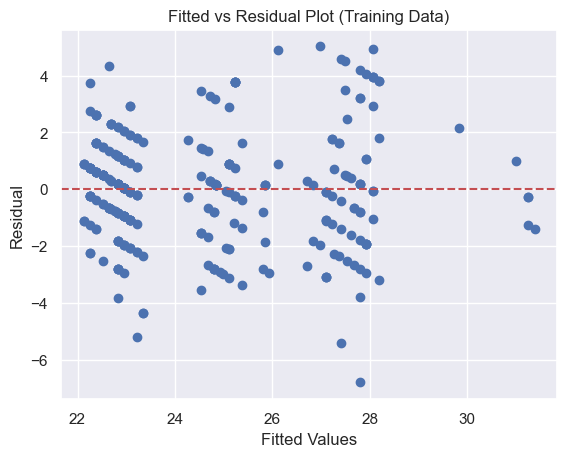

In [22]:
train_predictions = model.predict(df_train)
resid = df_train["Age"] - df_train["predictions"]
plt.scatter(train_predictions, resid)
plt.axhline(y=0, color='r', linestyle="--")
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Fitted vs Residual Plot (Training Data)")
plt.show()

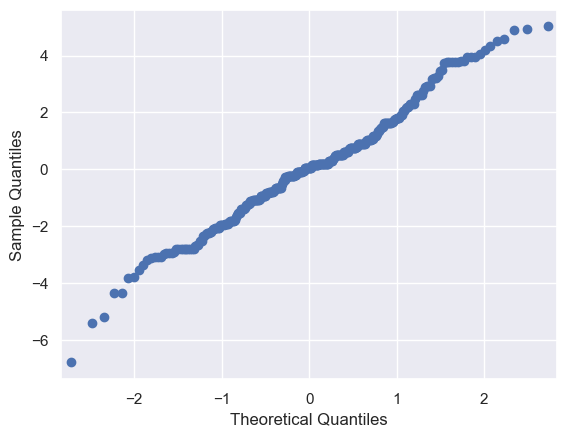

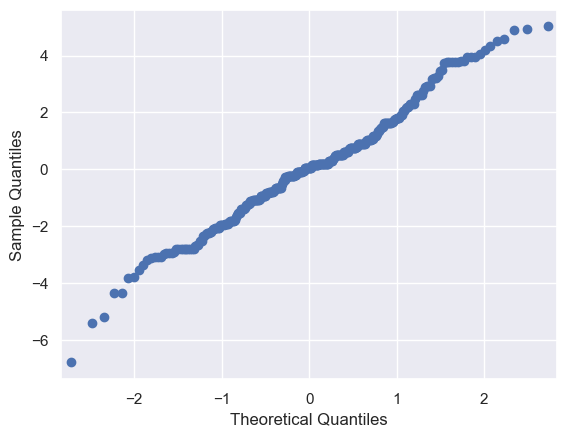

In [42]:
sm.qqplot(resid)

d. Examine the relationship between your selected x and y in the context of this model. Include the following:                               
i. Slope: 0.5697. On average, a male online shopper’s predicted expected age is about 0.5697 higher than a female online shopper’s predicted expected age whilst controlling for family size, marital status, and occupation.                                                            
ii. We are 95% confident that the predicted true slope coefficient for the number of people in a family is in between the range of ​​0.111 and 1.028.  
iii. Linear regression conditions:
No strong multicollinearity because we only have 1 quantitative variable. 
Response variable is Quantitative
There is a linear relationship between the explanatory variables and the response variable since our fitted vs residual plot has a relatively even distribution of positive and negative residuals.
Our variables showed to be independent to each other
Our qq plot portrays a relatively straight line so it shows normality.
Our model has a moderately high R^2 showing that there is a decent equal variance between the variables.

e. Model performance:                                                                                                                        
i. The percent of variability is 0.556. Being in the middle of the range for the percent of variability, it would be mediocre and nearly right in the middle.                                                                                                                         
ii. 1 Observation: We chose column 333. The predicted residual was 27.931530 and our actual age was 29, giving us a residual of 1.068470     
iii. RMSE: 
Training data: 1.9596024694007996, Test data: 2.0415595267787605                                                                             
Our predicted values for the ages of the online shoppers in our test data have an error of 2.0415595267787605, which means that’s how far off our values are, on average. This is considered a pretty low RMSE which is good for our case. 


f. We used our prediction model to determine the relationship between age and gender while controlling our other variables. We found that there was an expected increase of 0.5697 for a male consumer compared to a female consumer and also used a 95% confidence interval for this number. Our 95% confidence interval showed we are 95% confident that the predicted true slope coefficient (increase in expected age) for a male consumer is in between the range of ​​0.111 and 1.028.
We also determined how well our trained model fit with our testing data and received a fairly low RMSE which shows that our model can be a good fit for new data as well.

## 3. Logistic Regression Analytical Tasks

a. Research question: “Is there a linear relationship between the log-odds of the success level of y and age, gender, and occupation in the sample? How does a classifier built on this model perform on new data?” 

In [23]:
df1 = pd.read_csv("onlinefoods.csv")
df_train1, df_test1 = train_test_split(df1, test_size = 0.2, random_state = 100)
df_train1

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
333,29,Male,Married,Employee,25001 to 50000,Graduate,4,12.9261,77.6221,560034,No,Negative,No
368,23,Female,Single,Student,No Income,Post Graduate,3,12.9369,77.6407,560095,No,Positive,No
301,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
219,27,Female,Married,Self Employeed,25001 to 50000,Graduate,3,13.0078,77.5577,560055,Yes,Positive,Yes
6,22,Male,Single,Student,No Income,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,28,Male,Married,Employee,25001 to 50000,Post Graduate,5,13.0262,77.6200,560045,Yes,Positive,Yes
359,29,Male,Single,Self Employeed,More than 50000,Graduate,6,12.8845,77.6036,560076,Yes,Positive,Yes
323,22,Male,Single,Student,No Income,Graduate,3,13.0158,77.5390,560096,Yes,Positive,Yes
280,19,Male,Single,Student,No Income,Graduate,6,12.9048,77.6821,560036,Yes,Positive,Yes


In [24]:
import statsmodels.formula.api as smf
df_train1["y"] = df_train1["Feedback"].replace({"Negative ": 0, "Positive": 1})
results1 = smf.logit("y ~ Age + Gender + Occupation", data=df_train1).fit()
results1.summary()

Optimization terminated successfully.
         Current function value: 0.445386
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  310
Model:                          Logit   Df Residuals:                      304
Method:                           MLE   Df Model:                            5
Date:                Sat, 20 Apr 2024   Pseudo R-squ.:                 0.04722
Time:                        17:25:38   Log-Likelihood:                -138.07
converged:                       True   LL-Null:                       -144.91
Covariance Type:            nonrobust   LLR p-value:                   0.01774
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        2.7546      1.717      1.604      0.109      -0.610       6.120
Gender[T.Male]                  -0.0973      0.323     -0.302      0.763      -0.730       0.535
Occupation[T.House wife]         0.8271      1.177      0.703      0.482      -1.480       3.134
Occupation[T.Self Employeed]     0.0741      0.436      0.170      0.865      -0.781       0.929
Occupation[T.Student]            0.8703      0.420      2.074      0.038       0.048       1.693
Age                             -0.0636      0.064     -0.987      0.324      -0.190       0.063
================================================================================================
"""

b.Logistic regression model:
i. Log(odds of positive feedback) = 2.7546 - 0.0636 (Age) - 0.0973 (Male) + 0.8271 (housewife) + 0.0741 (self) + 0.8703 (student)            
ii. Age (-0.0636), Gender male (-0.0973) are negative and are associated with a lower probability of success. Occupation for housewife(0.8271) self (0.0741) student (0.8703) are all associated with a higher probability of success.                                    
iii. Pseudo-R^2: 0.04722, AUC: 0.6436007130124777                                                                                          This indicates that our model is not very strong as our pseudo-R^2 and AUC values are fairly low.

In [25]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
df_train1["predicted_probability"] = results1.predict()
fprs, tprs, thresholds = roc_curve(y_true = df_train1["y"], y_score = df_train1["predicted_probability"])
auc1 = roc_auc_score(y_true = df_train1["y"], y_score = df_train1["predicted_probability"])
auc1

0.6436007130124777

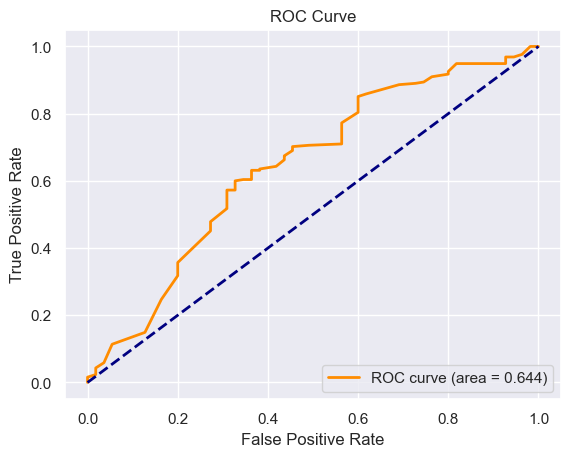

In [26]:
def plot_roc(fprs, tprs, auc1, lw=2):
    plt.plot(fprs, tprs, color='darkorange', lw=lw, label= 'ROC curve (area = '+str(np.round(auc1,3)) + ')')
    plt.plot([0, 1], [0, 1], color = 'navy', lw =lw, linestyle = '--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title("ROC Curve")
    plt.legend(loc ="lower right")
    plt.show()
plot_roc(fprs, tprs, auc1)

In [27]:
from sklearn.metrics import confusion_matrix
def fpr_tpr_thresh(y, pred_prob, thresh):
    yhat = 1*(pred_prob >= thresh)
    tn, fp, fn, tp = confusion_matrix(y_true = y, y_pred =yhat).ravel()
    tpr = tp / (fn+tp)
    fpr = fp / (fp + tn)
    return pd.DataFrame({"threshold" : [thresh], "fpr" : [fpr], "tpr" : [tpr]})

In [28]:
for thresh in np.arange(0, 1.01, 0.01):
    print(fpr_tpr_thresh(df_train1["y"], df_train1["predicted_probability"], thresh))

   threshold  fpr  tpr
0        0.0  1.0  1.0
   threshold  fpr  tpr
0       0.01  1.0  1.0
   threshold  fpr  tpr
0       0.02  1.0  1.0
   threshold  fpr  tpr
0       0.03  1.0  1.0
   threshold  fpr  tpr
0       0.04  1.0  1.0
   threshold  fpr  tpr
0       0.05  1.0  1.0
   threshold  fpr  tpr
0       0.06  1.0  1.0
   threshold  fpr  tpr
0       0.07  1.0  1.0
   threshold  fpr  tpr
0       0.08  1.0  1.0
   threshold  fpr  tpr
0       0.09  1.0  1.0
   threshold  fpr  tpr
0        0.1  1.0  1.0
   threshold  fpr  tpr
0       0.11  1.0  1.0
   threshold  fpr  tpr
0       0.12  1.0  1.0
   threshold  fpr  tpr
0       0.13  1.0  1.0
   threshold  fpr  tpr
0       0.14  1.0  1.0
   threshold  fpr  tpr
0       0.15  1.0  1.0
   threshold  fpr  tpr
0       0.16  1.0  1.0
   threshold  fpr  tpr
0       0.17  1.0  1.0
   threshold  fpr  tpr
0       0.18  1.0  1.0
   threshold  fpr  tpr
0       0.19  1.0  1.0
   threshold  fpr  tpr
0        0.2  1.0  1.0
   threshold  fpr  tpr
0       0.2

In [33]:
df_train1["predicted_probability"] = results1.predict()
df_train1["predicted"] = 1*(df_train1["predicted_probability"]>= 0.83)
df_train1

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12,y,predicted_probability,predicted
333,29,Male,Married,Employee,25001 to 50000,Graduate,4,12.9261,77.6221,560034,No,Negative,No,0,0.692773,0
368,23,Female,Single,Student,No Income,Post Graduate,3,12.9369,77.6407,560095,No,Positive,No,1,0.896816,1
301,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes,1,0.902554,1
219,27,Female,Married,Self Employeed,25001 to 50000,Graduate,3,13.0078,77.5577,560055,Yes,Positive,Yes,1,0.752445,0
6,22,Male,Single,Student,No Income,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes,1,0.893651,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,28,Male,Married,Employee,25001 to 50000,Post Graduate,5,13.0262,77.6200,560045,Yes,Positive,Yes,1,0.706139,0
359,29,Male,Single,Self Employeed,More than 50000,Graduate,6,12.8845,77.6036,560076,Yes,Positive,Yes,1,0.708306,0
323,22,Male,Single,Student,No Income,Graduate,3,13.0158,77.5390,560096,Yes,Positive,Yes,1,0.893651,1
280,19,Male,Single,Student,No Income,Graduate,6,12.9048,77.6821,560036,Yes,Positive,Yes,1,0.910468,1


In [34]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_true=df_train1['y'], y_pred=df_train1["predicted"])
tn, fp, fn, tp = conf_matrix.ravel()
(tn, fp, fn, tp)

(37, 18, 102, 153)

In [37]:
Accuracy_rate = (tn + tp) / (tn + fp + fn + tp)
Accuracy_rate

0.6129032258064516

In [39]:
Sensitivity = tp / (fn + tp)
Sensitivity

0.6

In [41]:
Specificity = tn / (tn + fp)
Specificity

0.7534246575342466

c. Error: We want to minimize the false positive because this means that we predict that the online shopper is giving us positive feedback, but in reality, they are giving us negative feedback. This could hurt our online store as we don’t do anything to address the negative feedback since we think it's positive, and the negative feedback hurts the shop as people become more reluctant to buy things from there as more negative feedback accumulates. 

d. Classifier: i. Accuracy rate: 0.6129032258064516, Sensitivity: 0.6, Specificity: 0.7534246575342466                                       
ii. We are satisfied with the performance of our classifier as our rates for accuracy rate, sensitivity, and specificity are relatively high, definitely greater than the halfway margin. 


e. Conclusion: Our overall goal was to determine what variables affect the results to the shopper’s feedback. To determine the predicted log odds of whether the feedback is positive or negative, we decided to use our predictors of age, gender, and occupation. In doing so, we can determine what type of people decide to give what types of feedback so the online shop can focus on the needs of those customers to prevent any more negative feedback from happening. Considering our pseudo R^2 and our AUC, our model might not be the best predictor in determining the outcomes of the feedback. However, while our mode might not be strong, using our predicted probability threshold may be more optimal in giving us more accurate predictions, reducing any false positive errors that may hurt the overall online shopping site as a whole.  

## 4. Conclusion

a. Summarization: For our linear regression model, we used our prediction model to determine the relationship between age and gender while controlling our other variables. We found that there was an expected increase of 0.5697 for a male consumer compared to a female consumer and also used a 95% confidence interval for this number. Our 95% confidence interval showed we are 95% confident that the predicted true slope coefficient (increase in expected age) for a male consumer is in between the range of ​​0.111 and 1.028. For the logistics regression, to determine the predicted log odds of whether the feedback is positive or negative, we decided to use our predictors of age, gender, and occupation. Considering our pseudo R^2 and our AUC, our model might not be the best predictor in determining the outcomes of the feedback.

b. Limitations: The limitations that we faced in the analysis portion were that the column names were not reading into the data set and therefore we had to change the names. However, other than that, the data was very clean and there was not much that needed to be modified. Some important contextual information would be that the occupation is split up into very general groups (employee, student, and housewife), so the data may not reflect specific industry workers from the rest. This might affect the decision on how ads should be targeted to users who are employees.     

c. Future work: In the future, an analysis that focuses on a different aspect of the data set such as monthly income to see if there is a range that buys more products compared to others, which will also be beneficial to online shopping business owners. 
